In [2]:
import missingno as msno
from itertools import permutations, product
import itertools
import calendar
from hoboreader import HoboReader
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
from helper_functions import *
import pandas as pd
from pandas import read_csv
import csv
import unittest
import numpy as np
from pprint import pprint
from setuptools import setup, find_packages
from codecs import open
from os import path
from epw import epw
import sys
from datetime import datetime, date
import numpy as np
import pandas as pd
import requests
from epw import epw
import time
from tqdm import tqdm
from pprint import pprint
import pandas as pd
import math
import pandas as pd
from hoboreader import HoboReader
import sys
print(sys.version)
%matplotlib inline
pd.set_option('mode.chained_assignment', None)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 150


3.7.7 (default, Apr 15 2020, 05:09:04) [MSC v.1916 64 bit (AMD64)]


In [26]:
# DL1	Stone Garden - Tjaden Hall
# DL2	PSB Parking Lot
# DL3	Olin Library
# DL4	Milstein Hall Roof
# DL5	Game Farm Road

S1 = HoboReader("DL1_Stone_Garden_Tjaden_Hall.csv")
S2 = HoboReader("DL2_PSB_Parking_Lot.csv")
S3 = HoboReader("DL3_Olin_Library.csv")
S4 = HoboReader("DL4_Milstein_Hall_Roof.csv")
S5 = HoboReader("DL5_Game_Farm_Road.csv")

df1 = S1.get_dataframe()
df2 = S2.get_dataframe()
df3 = S3.get_dataframe()
df4 = S4.get_dataframe()
df5 = S5.get_dataframe()

# DF5 (GAME FARM ROAD) HAS TO BE SHIFTED BACK BECAUSE IT NATIVELY RECORDS DST, OUR STATIONS DO NOT.
# THE OTHER STATIONS ARE NOT SHIFTED (HENCE 0 VALUE FOR PERIODS), JUST THERE FOR SANITY

df5 = df5.shift(periods=(-2), fill_value=0)
df4 = df4.shift(periods=(0), fill_value=0)
df3 = df3.shift(periods=(0), fill_value=0)
df2 = df2.shift(periods=(0), fill_value=0)
df1 = df1.shift(periods=(0), fill_value=0)

interactive(children=(IntSlider(value=4, description='variable_id', max=8, min=1), IntSlider(value=15, descrip…

<function __main__.plot(variable_id, period_len, day, resample_len, month, year)>

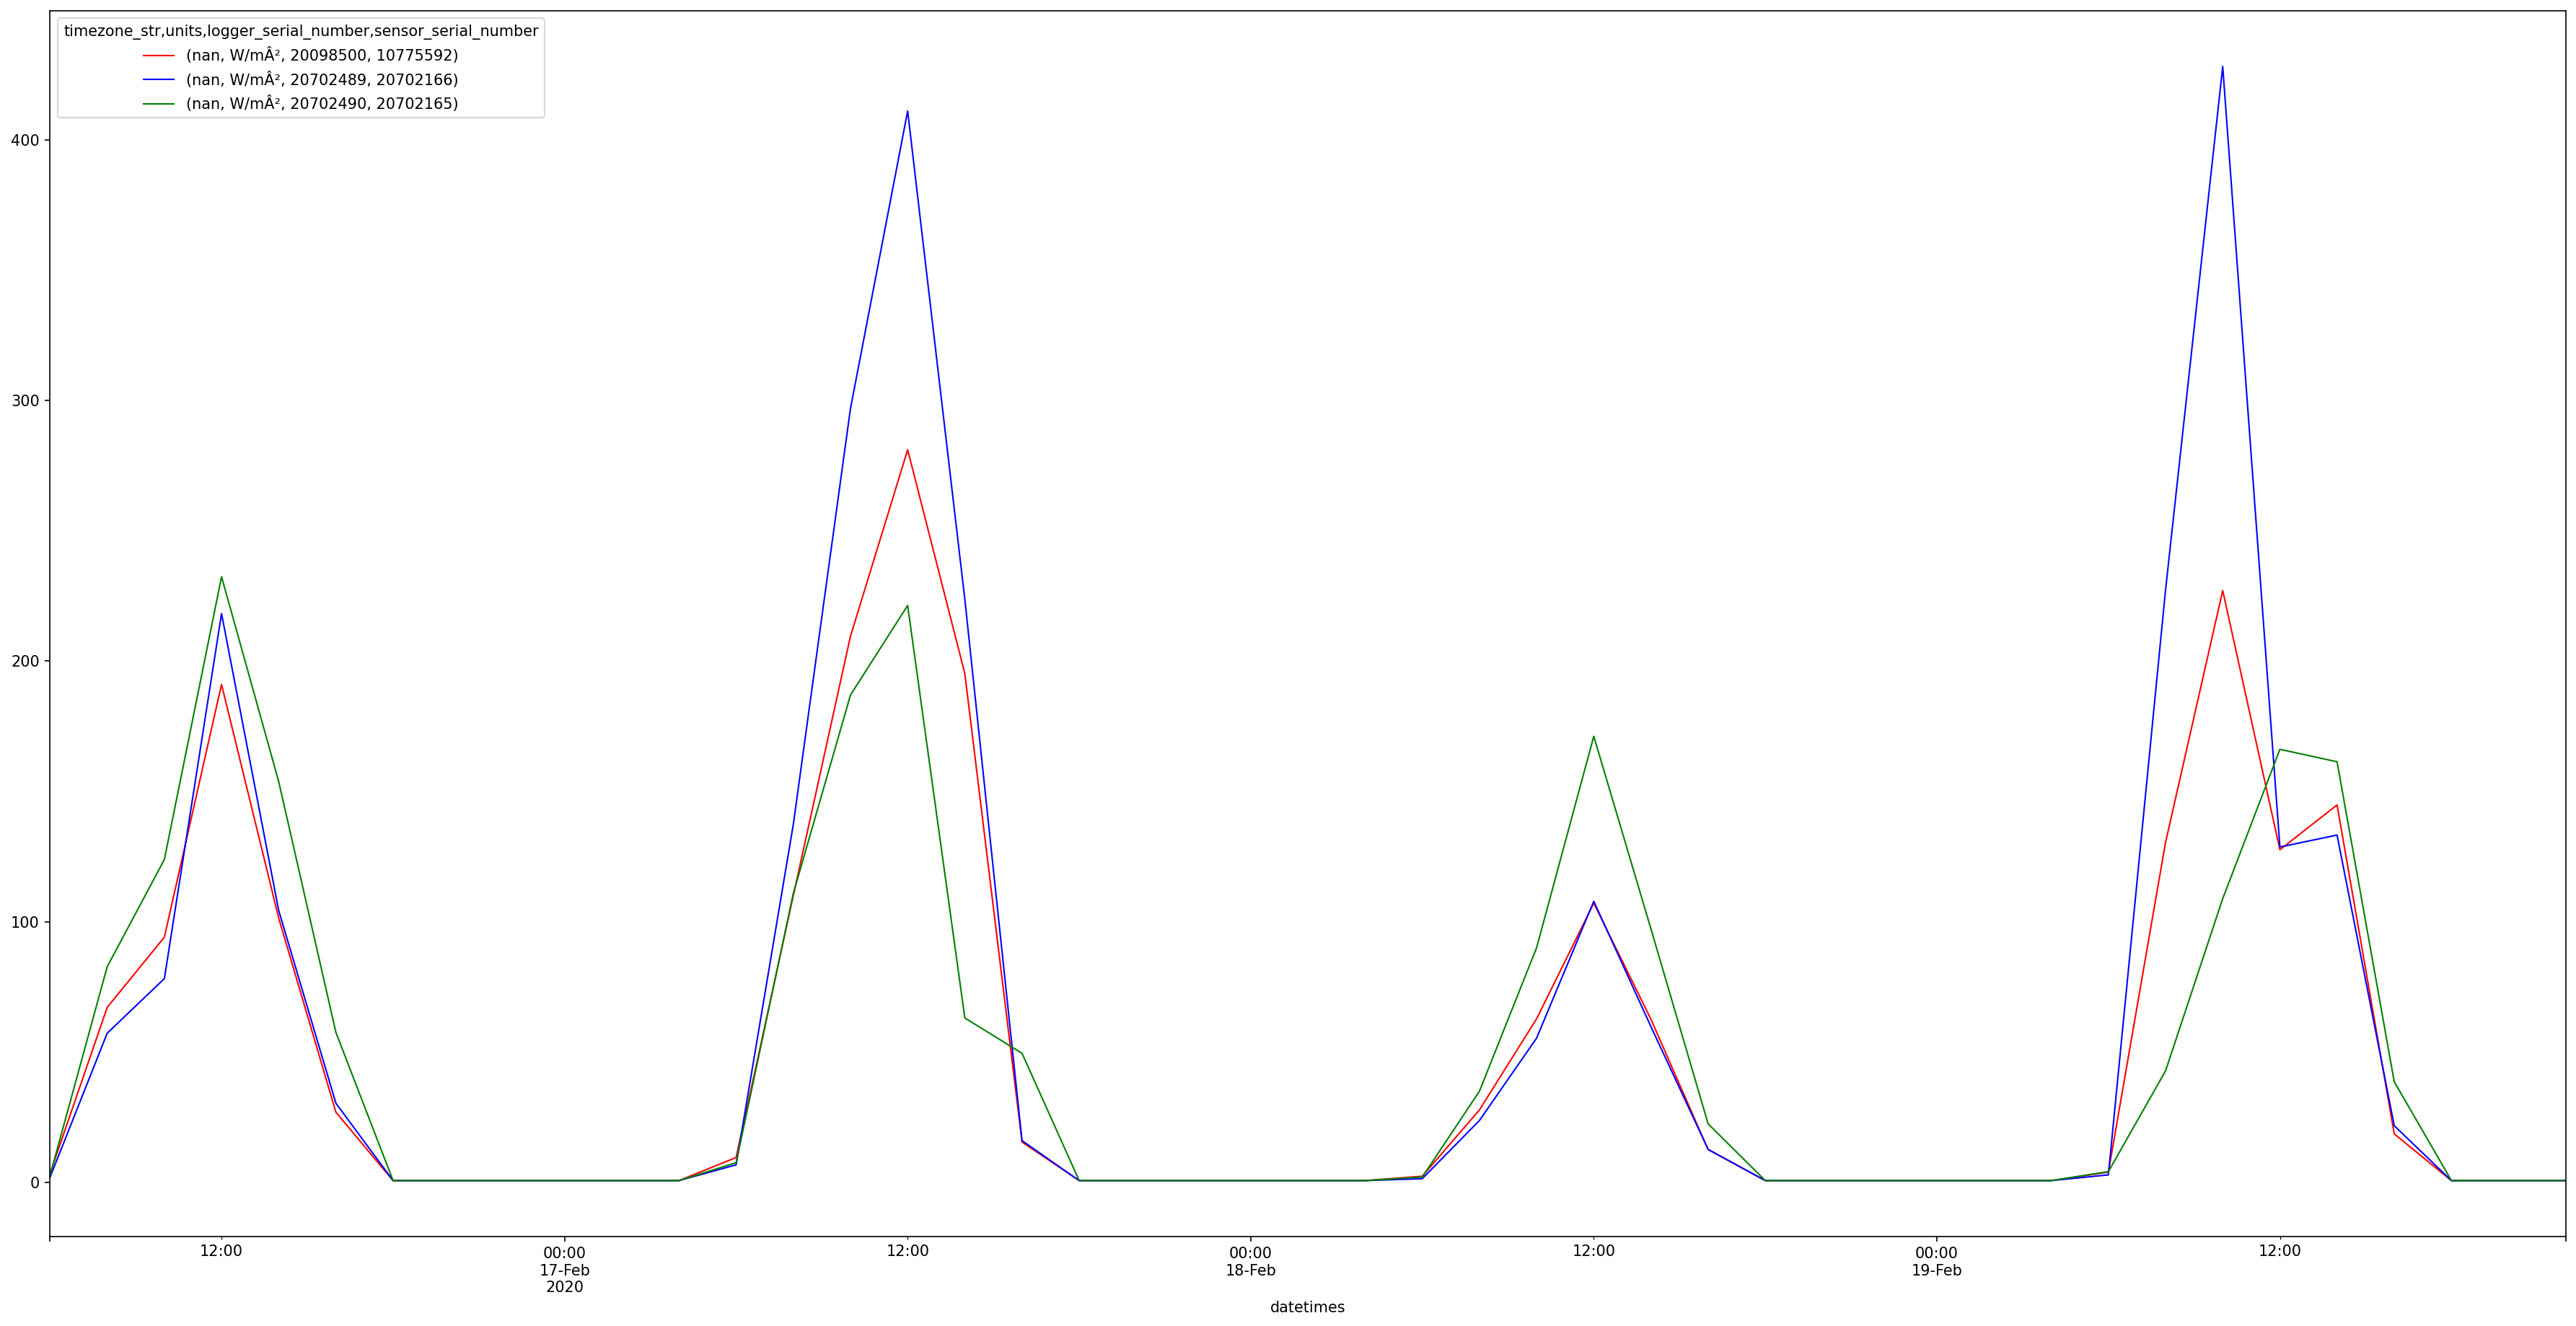

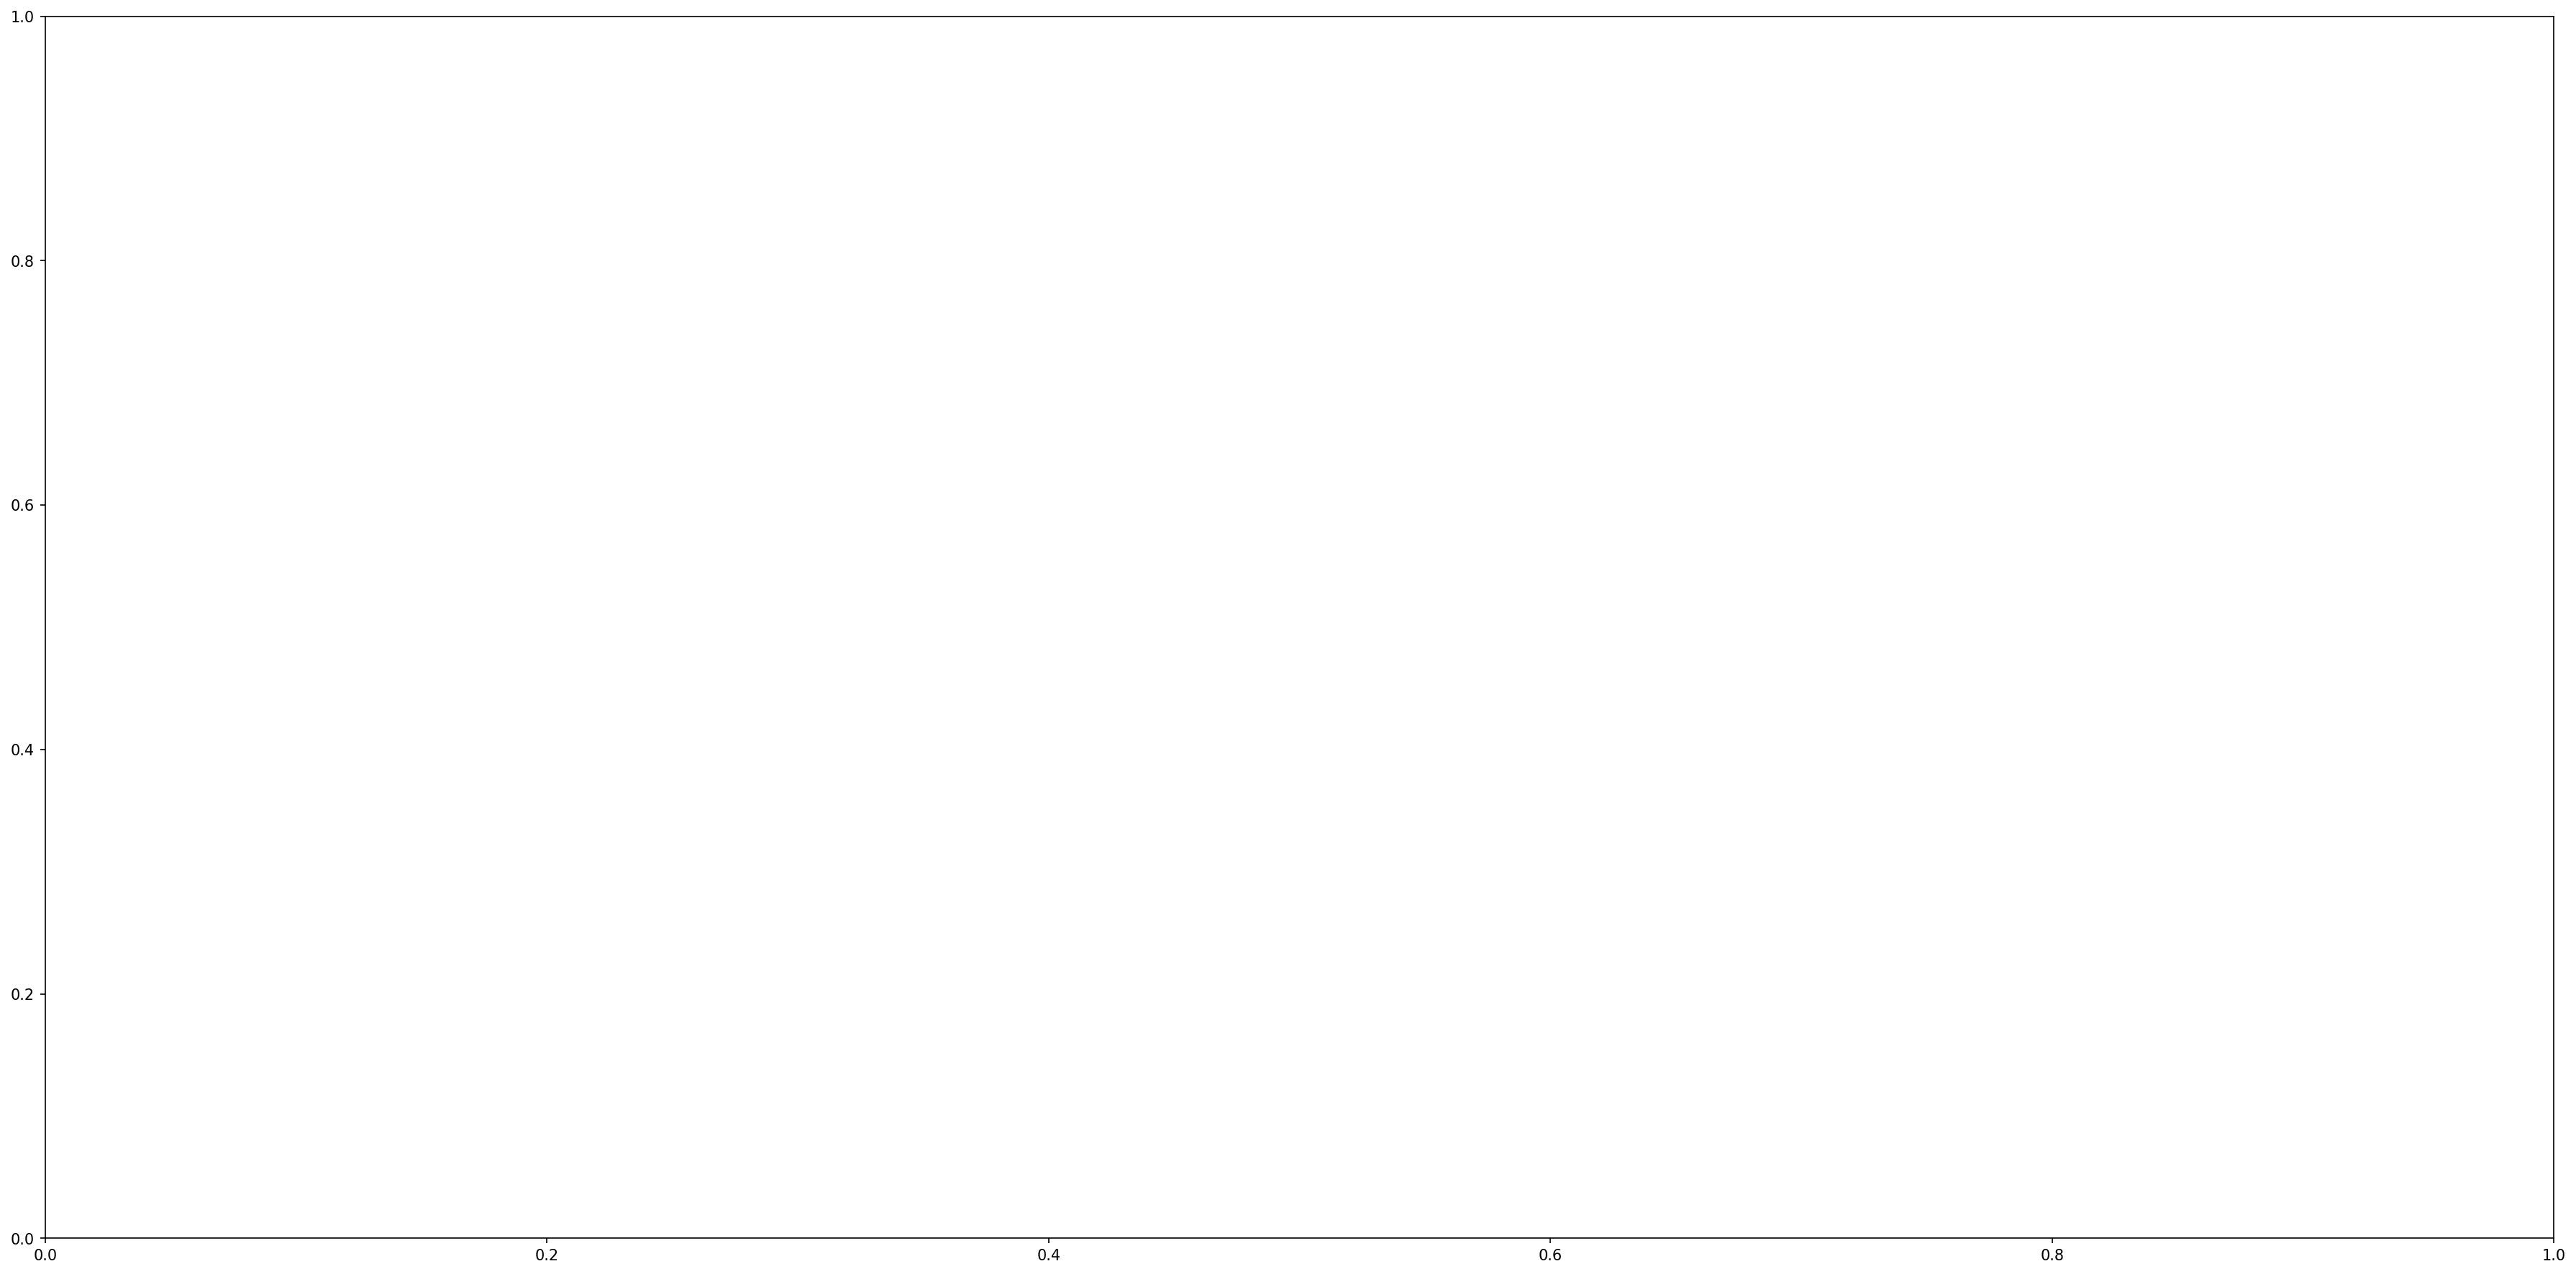

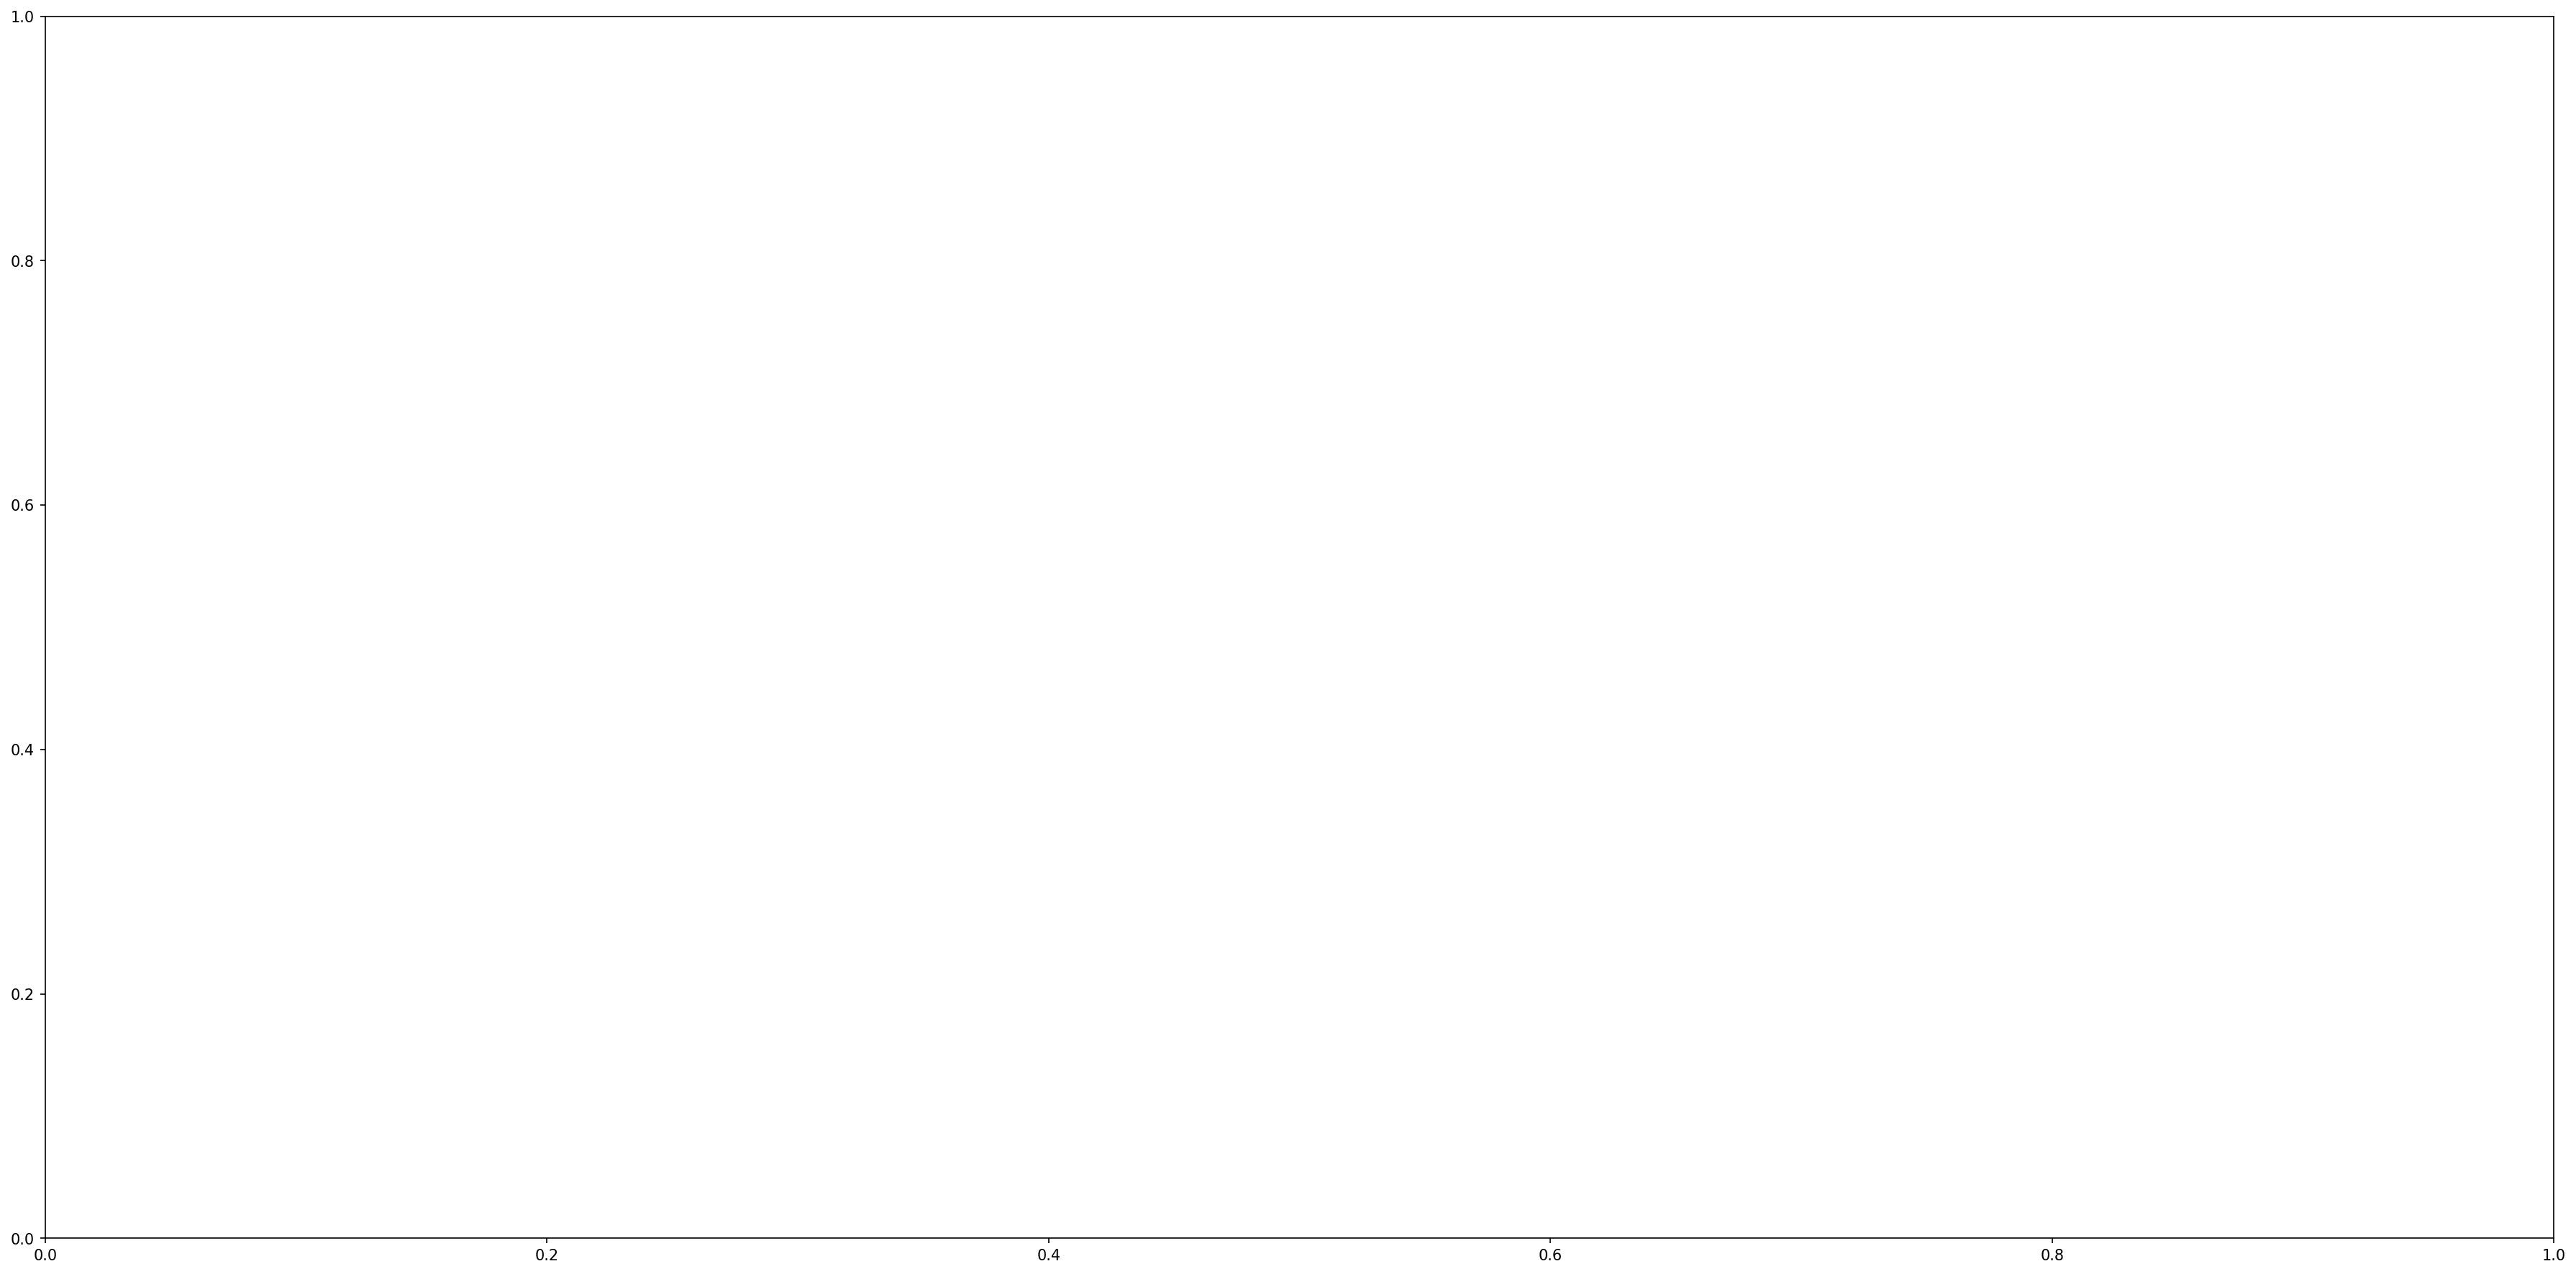

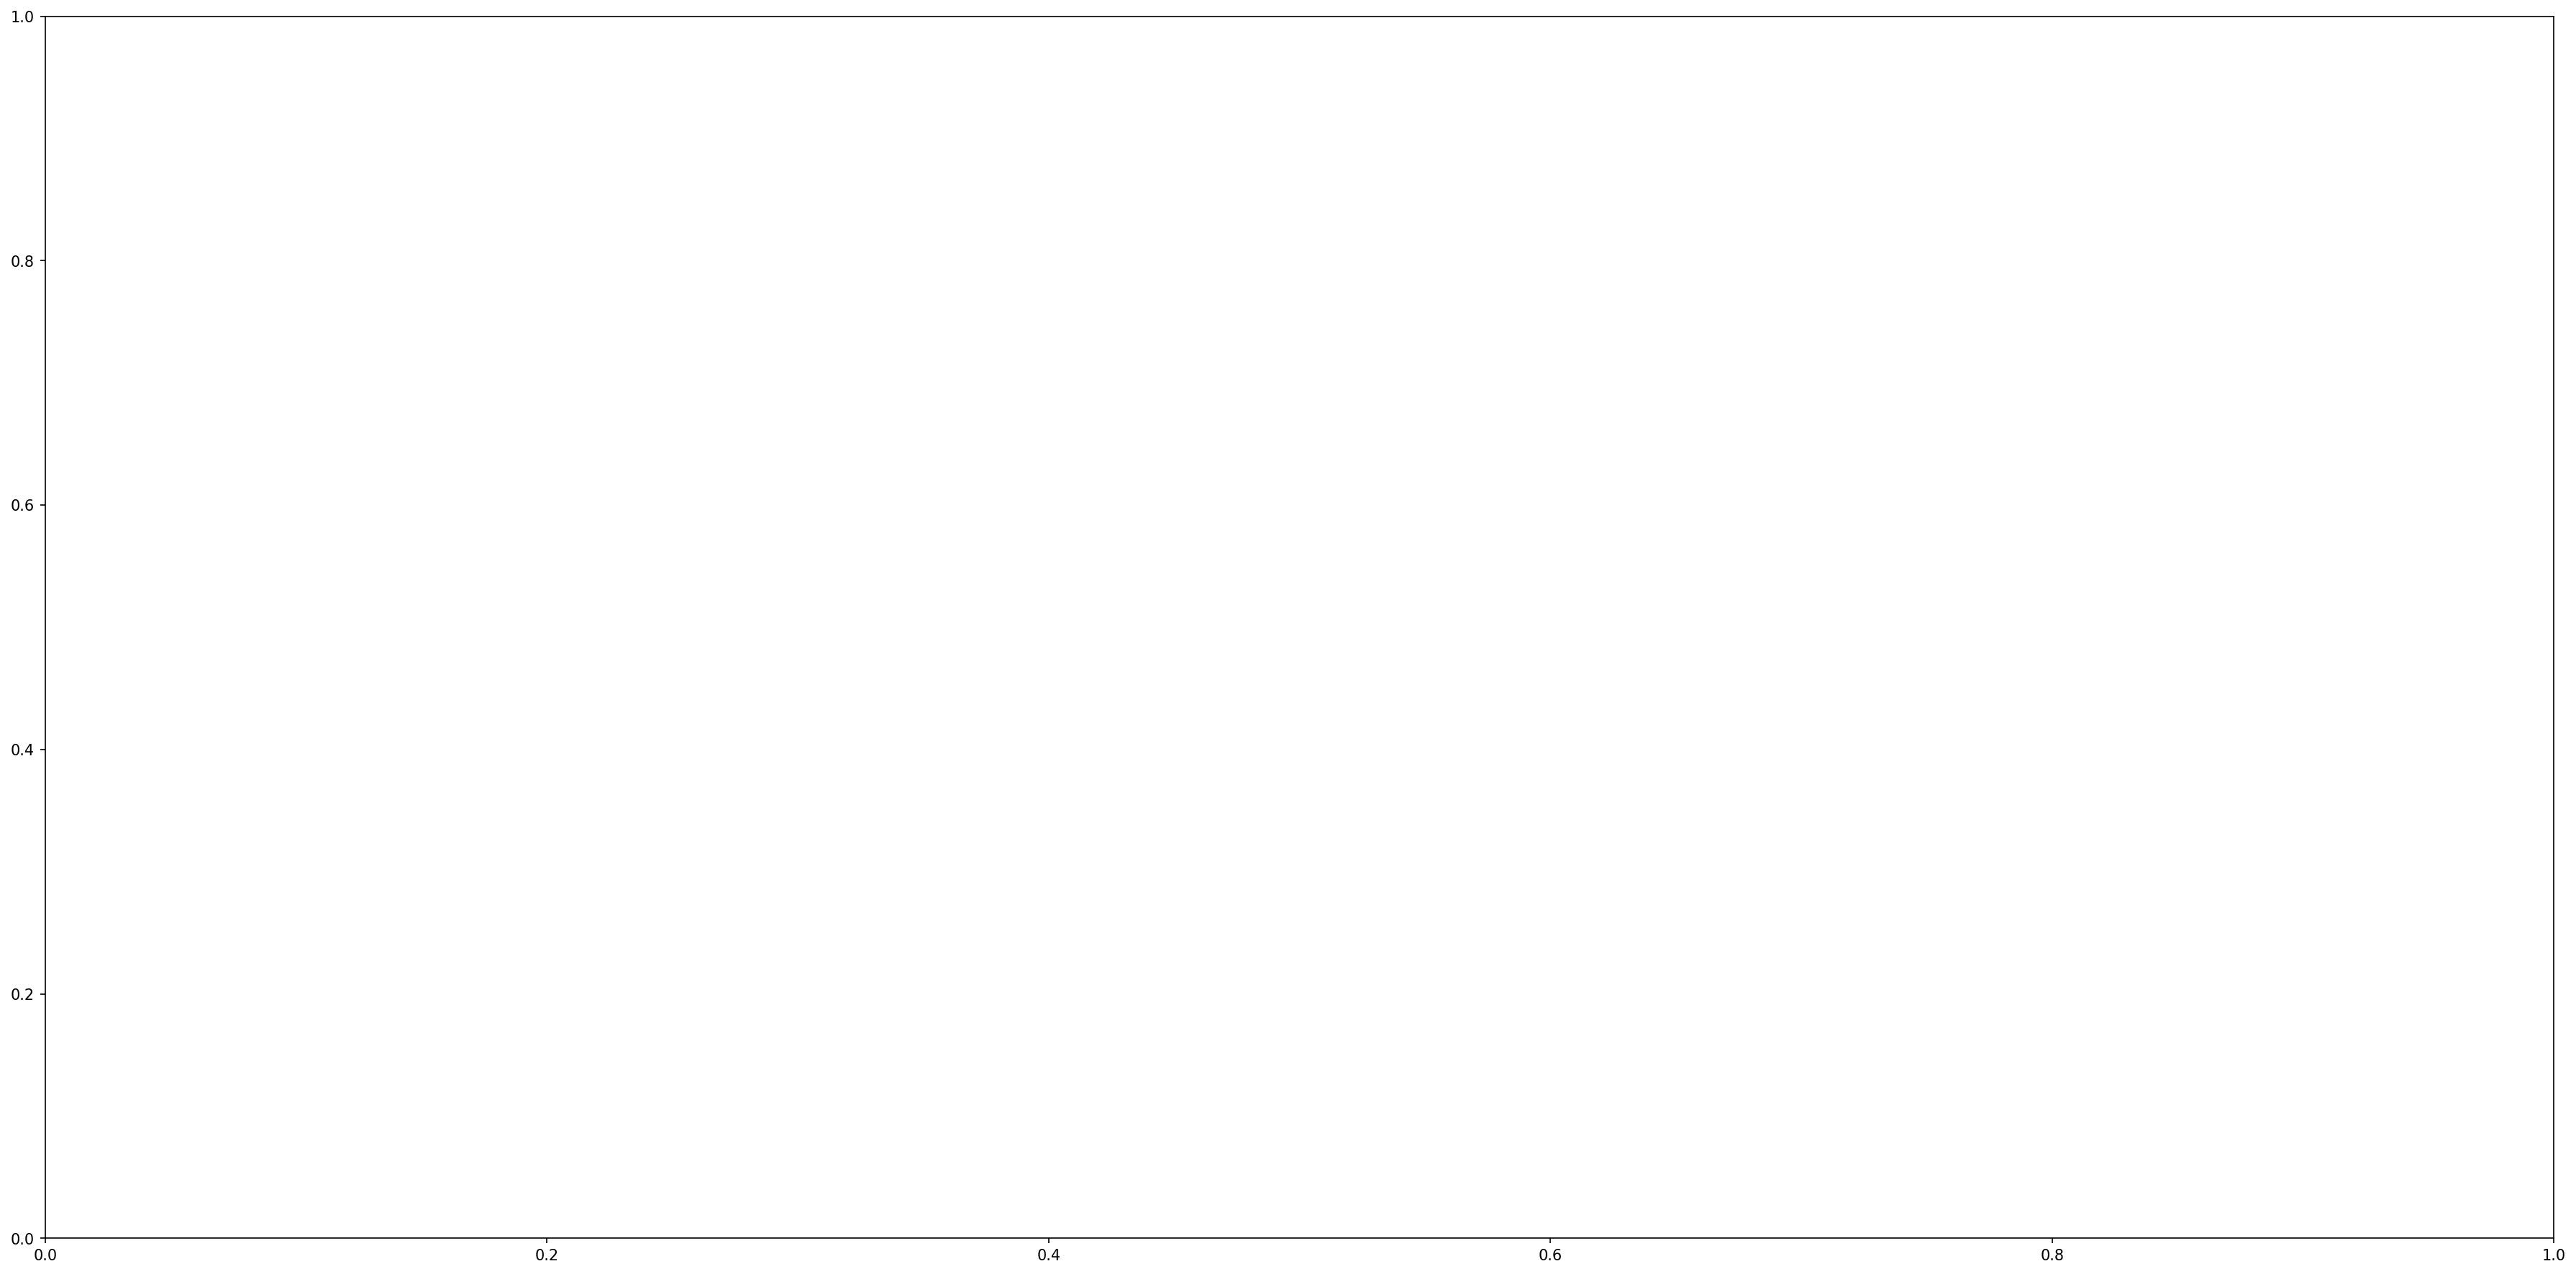

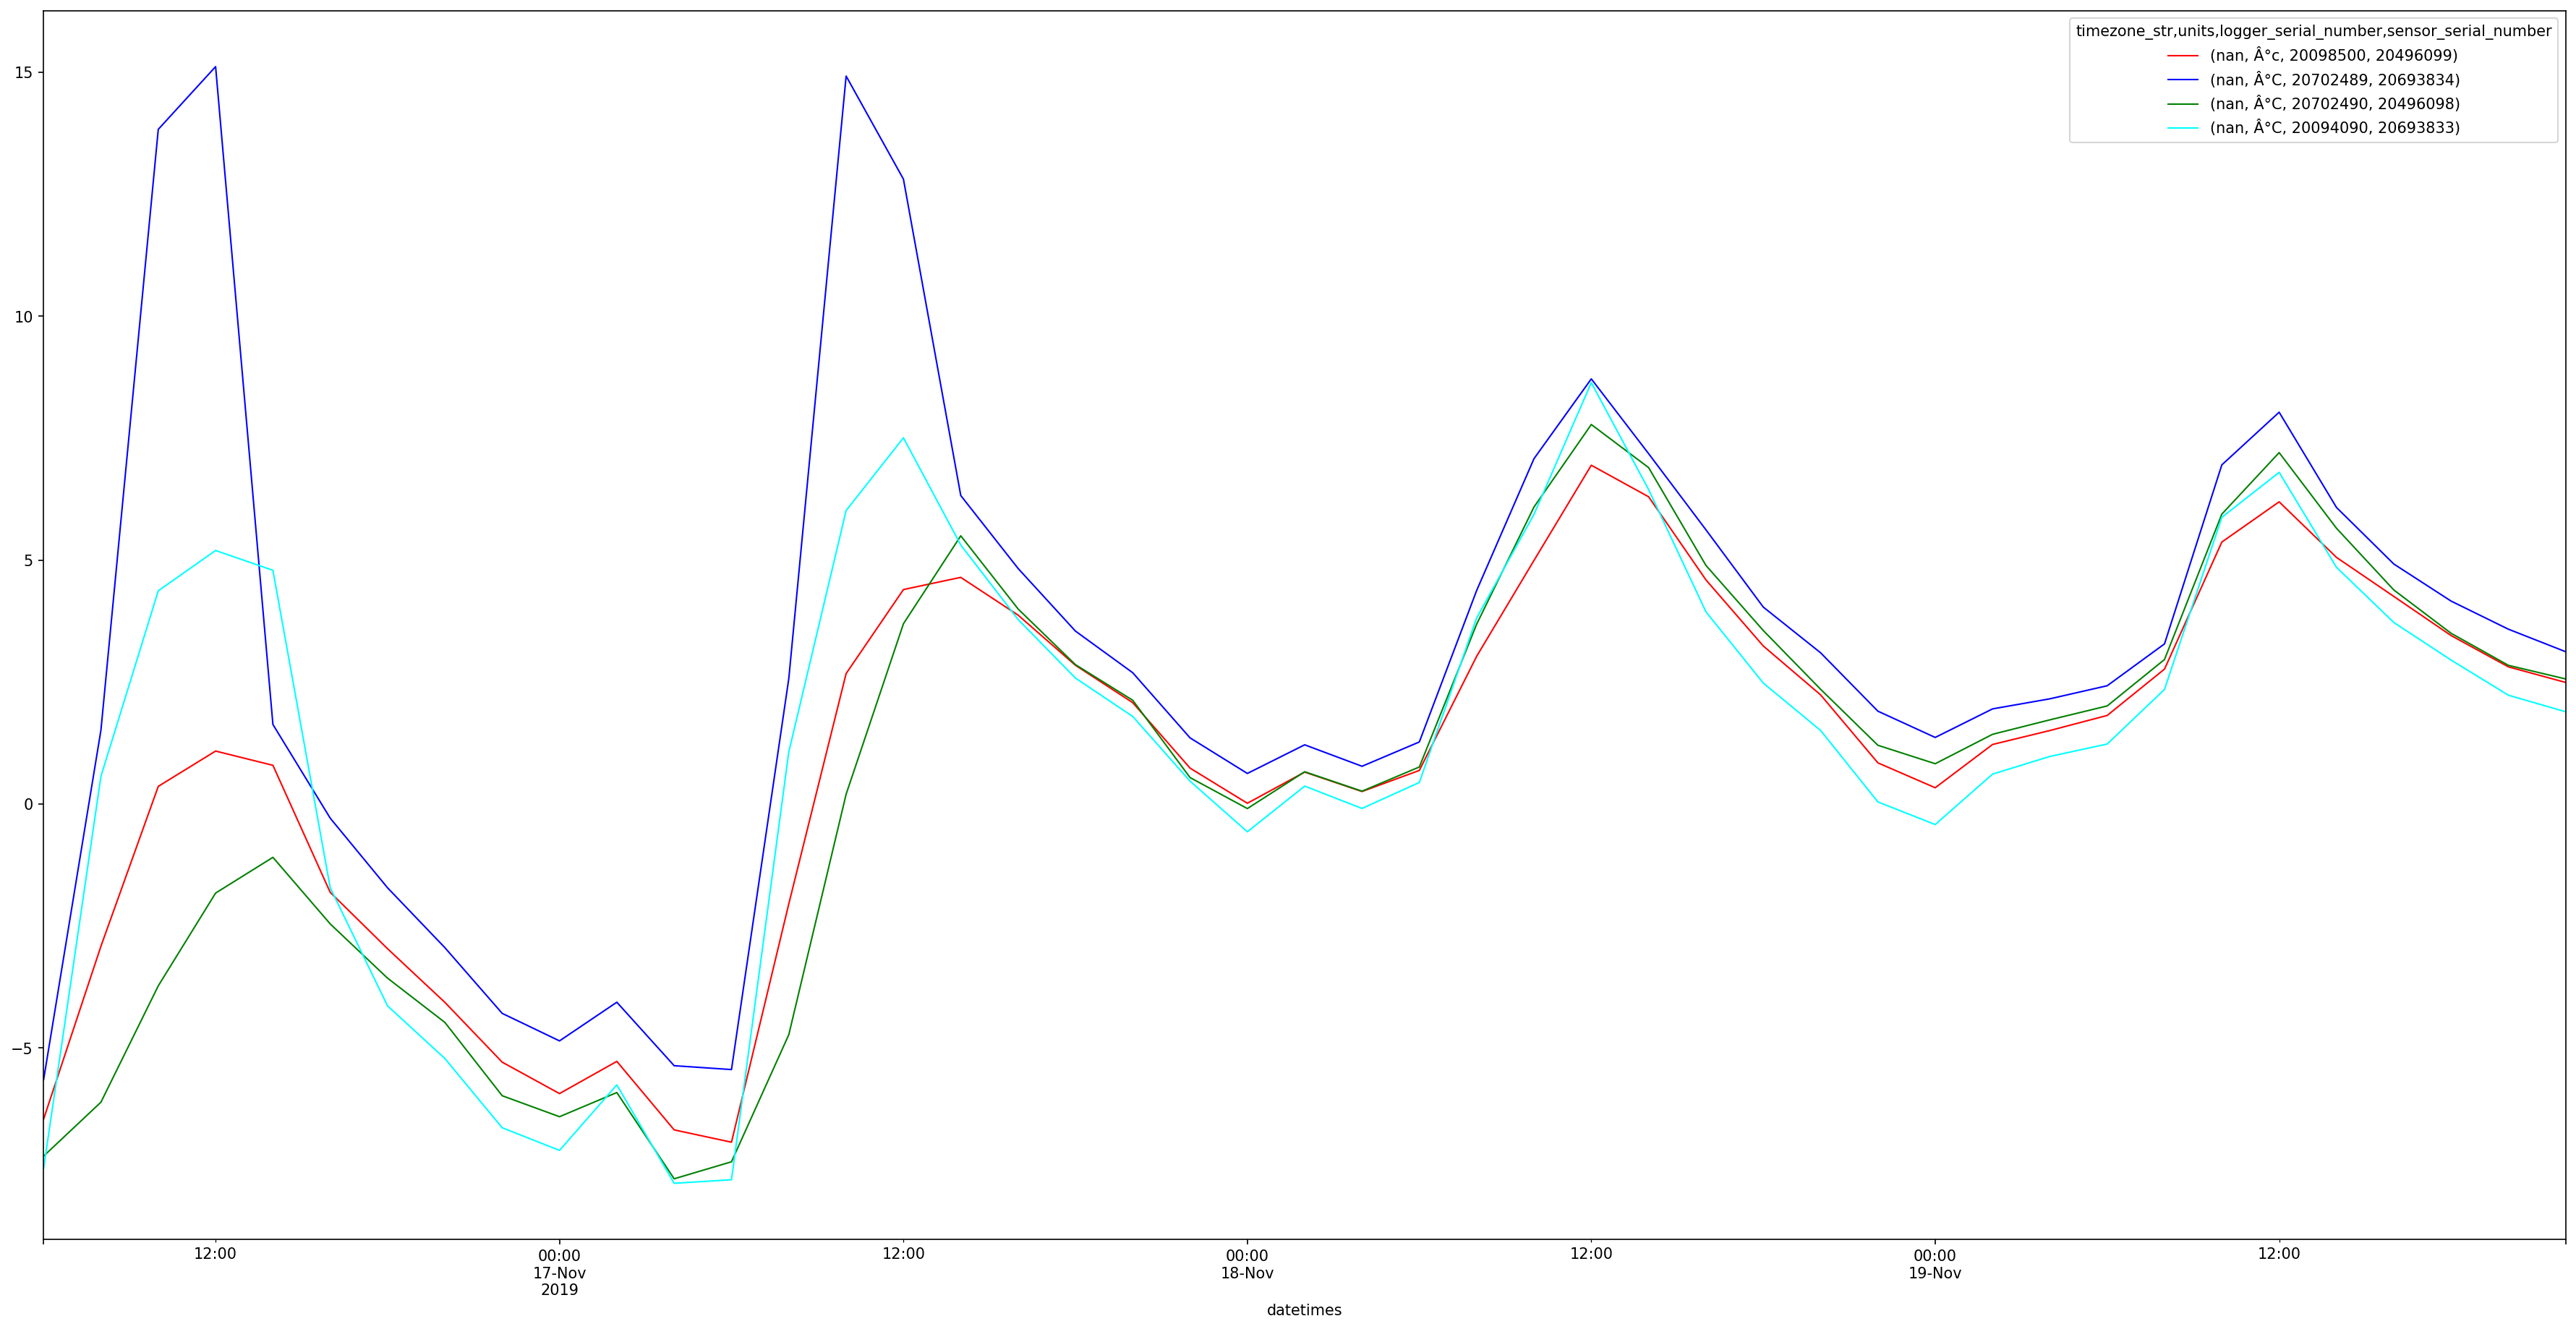

In [33]:
def plot(variable_id, period_len, day, resample_len, month, year):

    start_time = str(year) + '-' + str(month) + '-' + str(day) + ' 11:00:00-00:00'
    end_time = str(year) + '-' + str(month) + '-' + str(day + period_len ) + ' 04:00:00-00:00'

    df1_ = df1.loc[start_time:end_time]
    df2_ = df2.loc[start_time:end_time]
    df3_ = df3.loc[start_time:end_time]
    df4_ = df4.loc[start_time:end_time]
    df5_ = df5.loc[start_time:end_time]

    # Resample subhourly data to 1 hourly graph (OUR STATIONS RECORD IN 10MIN INTERVALS, GFR IN 1HR, RESAMPLE FOR EASY COMPARISON. CAN TURN OFF)
    df1_ = df1_.resample(str(resample_len) + 'H').mean()
    df2_ = df2_.resample(str(resample_len) + 'H').mean()
    df3_ = df3_.resample(str(resample_len) + 'H').mean()
    df4_ = df4_.resample(str(resample_len) + 'H').mean()
    df5_ = df5_.resample(str(resample_len) + 'H').mean()

    # Resize figure
    custom_figsize = (30, 15)

    # Change lineweights
    lineweights = 1.5

    variables = [
        "Wind Speed", "MRT", "Temp", "RH", "Solar Radiation", "Wind Speed",
        "Gust Speed", "Wind Direction", "DewPt"
    ]

    variable = variables[variable_id]

    # Plot both temp and mrt when temp is selected

    if variable == "MRT" or variable == "DewPt" or variable == "Gust Speed":
        ax = df1_.plot(y=variable, lw=1, figsize=custom_figsize, color='red')
        df2_.plot(y=variable,
                  lw=1,
                  figsize=custom_figsize,
                  color='blue',
                  ax=ax)
        df3_.plot(y=variable,
                  lw=1,
                  figsize=custom_figsize,
                  color='green',
                  ax=ax)
        df4_.plot(y=variable,
                  lw=1,
                  figsize=custom_figsize,
                  color='aqua',
                  ax=ax)
        df5_.plot(y=variable,
                  lw=3.5,
                  figsize=custom_figsize,
                  color='black',
                  ax=ax)

    elif variable == "Temp":
        # Plot two dataframes into one plot
        ax = df1_.plot(y=variable, lw=2, figsize=custom_figsize, color='red')
        df2_.plot(y=variable,
                  lw=2,
                  figsize=custom_figsize,
                  color='blue',
                  ax=ax)
        df3_.plot(y=variable,
                  lw=2,
                  figsize=custom_figsize,
                  color='green',
                  ax=ax)
        df4_.plot(y=variable,
                  lw=2,
                  figsize=custom_figsize,
                  color='aqua',
                  ax=ax)
        df5_.plot(y=variable,
                  lw=3.5,
                  figsize=custom_figsize,
                  color='black',
                  ax=ax)

        ax = df1_.plot(y="MRT",
                       lw=1,
                       figsize=custom_figsize,
                       style=['--'],
                       color='red',
                       ax=ax)
        df2_.plot(y="MRT",
                  lw=1,
                  figsize=custom_figsize,
                  style=['--'],
                  color='blue',
                  ax=ax)
        df3_.plot(y="MRT",
                  lw=1,
                  figsize=custom_figsize,
                  style=['--'],
                  color='green',
                  ax=ax)
        df4_.plot(y="MRT",
                  lw=1,
                  figsize=custom_figsize,
                  style=['--'],
                  color='aqua',
                  ax=ax)

    else:
        # Plot two dataframes into one plot
        ax = df1_.plot(y=variable, lw=1, figsize=custom_figsize, color='red')
        df2_.plot(y=variable,
                  lw=1,
                  figsize=custom_figsize,
                  color='blue',
                  ax=ax)
        df3_.plot(y=variable,
                  lw=1,
                  figsize=custom_figsize,
                  color='green',
                  ax=ax)
        df4_.plot(y=variable,
                  lw=1,
                  figsize=custom_figsize,
                  color='aqua',
                  ax=ax)
        df5_.plot(y=variable,
                  lw=2,
                  figsize=custom_figsize,
                  color='black',
                  ax=ax)

    # Legend
    ax.legend([
        "DL1 - Stone Garden - Tjaden Hall", "DL2 - PSB Parking Lot",
        "DL3 - Olin Library", "DL4 - Milstein Hall Roof ",
        "DL5 - Game Farm Road"
    ],
        loc='upper left',
        frameon=False,
        fontsize=20)

    # Fix xticks

    # years = mdates.YearLocator()  # every year
    # months = mdates.MonthLocator()  # every month
    # days = mdates.DayLocator()  # every day
    # minutes = mdates.MinuteLocator()  # every minute
    #days_fmt = mdates.DateFormatter('%d')

    # format the ticks
    # if period_len > 1:
    #    hours = mdates.HourLocator(interval=6)  # every 6 hours
    #    hours_fmt = mdates.DateFormatter('%H:00')
    #    ax.xaxis.set_major_locator(hours)
    #    ax.xaxis.set_major_formatter(hours_fmt)
    #
    # else:
    #    hours = mdates.HourLocator()  # every 6 hours
    #    hours_fmt = mdates.DateFormatter('%H:00')
    #
    #    ax.xaxis.set_major_locator(hours)
    #    ax.xaxis.set_major_formatter(hours_fmt)

    # we dont have minor ticks for now
    # ax.xaxis.set_minor_locator(hours)
    ax.tick_params(axis='both', which='minor', labelsize=22)
    ax.tick_params(axis='both', which='major', labelsize=22)

    # Labels
    plt.ylabel(variable, fontname="Consolas", fontsize=26)
    plt.xlabel("UTC Time", fontname="Consolas", fontsize=26)

    # Title
    ax.set_title(str(
        start_time.split(' ')[0] + " "
        'to'
        " " + end_time.split(' ')[0] + " " + variable),
        fontname="Consolas",
        fontsize=28)


# Variable to plot
# 1 = "MRT °C"
# 2 = "Temp °C"
# 3 = "RH"
# 4 = "Solar Radiation"
# 5 = "Wind Speed"
# 6 = "Gust Speed"
# 7 = "Wind Direction"
# 8 = "DewPt"

interact(plot,
         variable_id=(1, 8, 1),
         period_len=(1, 30, 1),
         resample_len=(1, 24, 1),
         day=(1, 31, 1),
         month=(1, 12, 1),
         year=(2019, 2021, 1))

In [ ]:
#PRINT RESAMPLED DATA (HOURLY) TO A .CSV FOR EPW FILE

S1 = HoboReader("DL1_Stone_Garden_Tjaden_Hall.csv")
S2 = HoboReader("DL2_PSB_Parking_Lot.csv")
S3 = HoboReader("DL3_Olin_Library.csv")
S4 = HoboReader("DL4_Milstein_Hall_Roof.csv")

df1 = S1.get_dataframe()
df2 = S2.get_dataframe()
df3 = S3.get_dataframe()
df4 = S4.get_dataframe()

df1 = df1.resample('H').mean()
df2 = df2.resample('H').mean()
df3 = df3.resample('H').mean()
df4 = df4.resample('H').mean()

display(df1)
display(df2)
display(df3)
display(df4)

#print(df1)
#print(df2)
#print(df3)
#print(df4)

df1.to_csv('DL1_TJADEN_hourly.csv')
df2.to_csv('DL2_PSB_hourly.csv')
df3.to_csv('DL3_OLIN_hourly.csv')
df4.to_csv('DL4_MILSTEIN_hourly.csv')

In [ ]:
# Reindl split test
import time
import math
import pandas as pd
from hoboreader import HoboReader
from gen_reindl import *

S2 = HoboReader("DL2_PSB_2019_EPW_DATA.csv")
df2 = S2.get_dataframe()

# Create date series using date_range() function
date_series = pd.date_range('01/01/2019', periods=8760, freq='H')
# print(date_series)

# altitude M Station (although not necessary for gen_reindl)
altitude = 255

# lat, lon taken from STATION
lat = 42.45062  # north-positive
lon = 76.48120  # west-positive for Reindl split (Alstan)

# Then the gen_reindl program can be run. -l is longitude (west positive),
# -a is latitude (north positive) and -m is the time zone in a multiple of
# 15 degrees from the meridian. The command below is for Singapore, and
# you note that it is in the wrong time zone. UTC+8 * 15 = -120, despite a
# -103.98 longitude.
# > gen_reindl -m -120 -l -103.98 -a 1.37 -i input.txt -o output.wea

# pos
time_zone = 5 * 15  # west-positive

#print("month, day, time, GHR\n")


%timeit GenReindl(lat, lon, time_zone).calc_split(4, 22, 8.333333333, 107)


def calc_split_df(df):
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['DHR'] = 0
    df['DNI'] = 0
    solar_rad_column = np.argmax(df.columns.get_loc('Solar Radiation'))

    i = 0
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        GHR = df.iloc[i, solar_rad_column]
        DNI, DHR = GenReindl(lat, lon, time_zone).calc_split(
            df.month[i], df.day[i], df.hour[i], GHR)
        #print(i,  GHR, DNI, DHR)
        dt = datetime(year=df.index.year[i], month=df.index.month[i],
                      day=df.index.day[i], hour=df.index.hour[i])
        df.loc[dt, 'DHR'] = DHR
        df.loc[dt, 'DNI'] = DNI
        i += 1

    return df

# Variables in the epw that we need


# From GFR
average temperature (F),
 relative humidity (%), 
solar radiation (langleys), 
10 meter wind speed (mph), 
wind direction (degrees), 
precipitation (inches)

# To EPW

average temperature (°C),
relative humidity (%), 
GHI  (Wh/m2), 
DNI  (Wh/m2), 
DHI  (Wh/m2), 
10 meter wind speed (m/s), 
wind direction (degrees), 
precipitation (cm or mm)


# Make the 2019 file
# Make the 2020 file and replace half of the year with the values from 2019

 df5_2020[start_time:end_time] = df5_2019.loc[start_time:end_time]



In [ ]:
def get_1y_data(df, year):
    return df[str(year)+'-01-01' :str(year)+'-12-31']
#get_1y_data(df5,2019)

def make_epw(title, year, hoho_df, reindl_df):
    

    e = epw()

    e.headers = {
        'LOCATION': [
            'Ithaca', 'NY', 'USA', 'TMY3', '725190', '42.43', '-76.49', '-5.0',
            '125.0'
        ],
        'DESIGN CONDITIONS': [],
        'TYPICAL/EXTREME PERIODS': [],
        'GROUND TEMPERATURES': [],
        'HOLIDAYS/DAYLIGHT SAVINGS': [],
        'COMMENTS 1': [],
        'COMMENTS 2': [],
        'DATA PERIODS': []
    }

    # print(e.headers)

    #variables = ["Wind Speed","MRT","Temp","RH","Solar Radiation","Wind Speed","Gust Speed","Wind Direction","DewPoint" ]

    dt = pd.date_range(datetime(int(year), 1, 1, 0, 0),
                       datetime(int(year), 12, 31, 23, 0),
                       freq="60min")
    
    
    if calendar.isleap(year):
        missing_values = np.array(np.ones(8784) * 999999).astype(int)
    else:
        missing_values = np.array(np.ones(8760) * 999999).astype(int)
            
    

    edf = e.dataframe

    edf['Year'] = dt.year.astype(int)
    edf['Month'] = dt.month.astype(int)
    edf['Day'] = dt.day.astype(int)
    edf['Hour'] = dt.hour.astype(int) + 1
    edf['Minute'] = dt.minute.astype(int)
    edf['Data Source and Uncertainty Flags'] = missing_values

    # Actual file starts here
    # 6
    # .apply(lambda x: ftoc(x), axis=1).values.flatten()
    edf['Dry Bulb Temperature'] = hoho_df['Temp'].values.flatten()

    #     Add this later (ADDED TO DL5_2019 FILE 07.22.2020)
    # missing_values
    edf['Dew Point Temperature'] = hoho_df['DewPt'].values.flatten()

    edf['Relative Humidity'] = hoho_df['RH'].values.flatten()

    # Added NREL pressure 2020-08-21
    if 'Pressure' in hoho_df:    
        edf['Atmospheric Station Pressure'] = hoho_df['Pressure'].values.flatten()
    else: 
        edf['Atmospheric Station Pressure'] = missing_values
        
        
    edf['Extraterrestrial Horizontal Radiation'] = missing_values
    #
    edf['Extraterrestrial Direct Normal Radiation'] = missing_values
    #
    edf['Horizontal Infrared Radiation Intensity'] = missing_values
    #
    edf['Global Horizontal Radiation'] = hoho_df[
        'Solar Radiation'].values.flatten()
    edf['Direct Normal Radiation'] = reindl_df['DNI'].values.flatten()
    edf['Diffuse Horizontal Radiation'] = reindl_df['DHR'].values.flatten()

    # Do we need this?
    # https://www.radiance-online.org//pipermail/radiance-general/2013-January/009140.html ?
    edf['Global Horizontal Illuminance'] = hoho_df['Solar Radiation'].values.flatten() * \
        179
    edf['Direct Normal Illuminance'] = reindl_df['DNI'].values.flatten() * 179
    edf['Diffuse Horizontal Illuminance'] = reindl_df['DHR'].values.flatten(
    ) * 179

    edf['Zenith Luminance'] = missing_values

    edf['Wind Direction'] = hoho_df['Wind Direction'].values.flatten().astype(
        int)
    edf['Wind Speed'] = hoho_df['Wind Speed'].values.flatten()

    if 'SkyCover' in hoho_df:
    
    # not sure which one to use (skycover)
        edf['Total Sky Cover'] = hoho_df['SkyCover'].replace(
        ' -', '1.0').astype(float).multiply(10).astype(int).values.flatten()
    #     This is from Ithaca airport data (NWS, NOAA) (ADDED TO DL5_2019 FILE 07.22.2020)
    #  (used if Horizontal IR Intensity missing)
        edf['Opaque Sky Cover'] = hoho_df['SkyCover'].replace(
        ' -', '1.0').astype(float).multiply(10).astype(int).values.flatten()
    else:
        edf['Total Sky Cover'] = missing_values
        edf['Opaque Sky Cover'] = missing_values
            
    #

    edf['Visibility'] = missing_values
    edf['Ceiling Height'] = missing_values
    edf['Present Weather Observation'] = missing_values
    #
    edf['Present Weather Codes'] = missing_values
    edf['Precipitable Water'] = missing_values
    edf['Aerosol Optical Depth'] = missing_values
    #
    edf['Snow Depth'] = missing_values
    edf['Days Since Last Snowfall'] = missing_values
    edf['Albedo'] = missing_values
    #

    # We have precipitation but lets not use it for now
    edf['Liquid Precipitation Depth'] = missing_values
    edf['Liquid Precipitation Quantity'] = missing_values

    #pd.options.display.max_columns = None
    #display(edf.loc[8:15])
    
    filename = str(title) + "_"+  str(year) + '.epw'

    e.write(filename)
    
    with open(filename,'r') as file:
        filedata = file.read()
        filedata = filedata.replace('.0,',',')
    with open(filename,'w') as file:
        file.write(filedata)
        
        
def show_missing_vals(csv, year):
    
    S = HoboReader(csv)
    
    df = S.get_dataframe()
    dfm = df.resample('H').mean()

    df_1y = get_1y_data(dfm,year)
    df_1y.index = df_1y.index.tz_convert(None)

    ix = pd.date_range(datetime(int(year), 1, 1, 0, 0),
                           datetime(int(year), 12, 31, 23, 0),
                           freq="60min")
    df_1y_re= df_1y.reindex(ix)
    fig = msno.matrix(df_1y_re.set_index(ix) , freq='M')
    fig_copy = fig.get_figure()
    fig_copy.savefig(s.split('.')[0]+ '_'+ str(year)+ '_MissingVals.png', bbox_inches = 'tight')

In [ ]:
# GAME FARM ROAD_ITHACA STATION

#S5 = HoboReader("DL5_Game_Farm_Road_2019.csv")
#hoho_df = S5.get_dataframe()

# There are about 35 variables in the core weather data. However, not all of them are used by EnergyPlus. Actually, despite of date and time columns, only 13 columns are used:
# dry bulb temperature
# dew point temperature
# relative humidity
# atmospheric pressure
# horizontal infrared radiation intensity from sky
# direct normal radiation
# diffuse horizontal radiation
# wind direction
# wind speed
# present weather observation
# present weather codes
# snow depth
# liquid precipitation depth

# https://www.radiance-online.org/pipermail/radiance-general/2015-April/010841.html

# Daniel,

# You should be able to generate the .wea file from diffuse horizontal
# radiation and direct normal radiation values. The structure of the lines
# after the heading in .wea file is:

# month day hour directNormalRadiation diffuseHorizontalRadiation

# Load NREL 2019 and take atmospheric pressure from there
year = 2019
nrel_2019 = Path.cwd() / Path("nrel_data/1162143_42.45_-76.50_2019.csv")
# print(nrel_2019)
nrel_2019_df = pd.read_csv(nrel_2019)
#df.columns = df.index[0]
nrel_2019_df.columns = nrel_2019_df.loc[nrel_2019_df.index[1]]
nrel_2019_df = nrel_2019_df.drop(nrel_2019_df.index[0])
nrel_2019_df = nrel_2019_df.drop(nrel_2019_df.index[0])

nrel_2019_pressure = nrel_2019_df['Pressure'].astype(int) * 100

# Real file

df5 = get_1y_data(df5, 2019)

# e.headers['LOCATION'][0]='Ithaca_NY'

# Design conditions and extreme periods are taken from the Syracuse file

make_epw("GameFarmRoad", "2019",df5, df5_reindl_1y)

In [ ]:
# All to EPW
year = [2019, 2020]

stations = ["DL1_Stone_Garden_Tjaden_Hall.csv","DL2_PSB_Parking_Lot.csv","DL3_Olin_Library.csv","DL4_Milstein_Hall_Roof.csv", "DL5_Game_Farm_Road.csv"]

ul= list(itertools.product(year, stations))


for y, s in ul:
    print(y,s)
    
    S = HoboReader(s)
    
    df = S.get_dataframe()
    dfm = df.resample('H').mean()

    df_1y = get_1y_data(dfm,y)
    df_1y.index = df_1y.index.tz_convert(None)
    df_split = calc_split_df(df_1y)

    ix = pd.date_range(datetime(int(y), 1, 1, 0, 0),
                           datetime(int(y), 12, 31, 23, 0),
                           freq="60min")
    df_1y_re= df_1y.reindex(ix).fillna(999)
    df_split_re= df_split.reindex(ix).fillna(999)
    make_epw(s.split('.')[0], y, df_1y_re, df_split_re)

In [ ]:
for y, s in ul:
    print(y,s)   
    show_missing_vals(s, y)

In [ ]:
a = epw()
a.read("DL4_Milstein_2019.epw")
day = 8
month = 12
year = 2019

hour_f = to_hour_of_year(0, day, month, year)
hour_t = to_hour_of_year(23, day, month,year)

print(hour_f, hour_t)

pd.set_option('display.max_rows', None)
a.dataframe.loc[hour_f-48:hour_t+48,['Wind Speed', 'Wind Direction']]
#a.dataframe.loc[:,['Wind Speed', 'Wind Direction']]

#display(a.dataframe)
